## Data Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *

In [3]:
from models import *
from data import * 
from env import *
from harmonize import *
from sim import *

In [4]:
# overall imports
import importlib
import data

# data load
#importlib.reload(data.data_load)
#importlib.reload(data.data_viz)

from data.data_load import load_transcriptome, load_connectome, load_coords
from data.data_viz import plot_connectome, plot_connectome_with_labels, plot_transcriptome
importlib.reload(data.data_load)
importlib.reload(data.data_viz)

# data utils
from data.data_utils import (
    reconstruct_connectome,
    reconstruct_upper_triangle,
    make_symmetric,
    expand_X_symmetric,
    expand_Y_symmetric,
    expand_X_symmetric_shared,
    expand_X_Y_symmetric_conn_only,
    expand_shared_matrices,
    expand_X_symmetric_w_conn, 
    process_cv_splits, 
    process_cv_splits_conn_only_model, 
    expanded_inner_folds_combined_plus_indices
)

import data.data_utils
importlib.reload(data.data_utils)

# cross-validation classes
import data.cv_split
from data.cv_split import RandomCVSplit, SchaeferCVSplit, CommunityCVSplit, SubnetworkCVSplit
importlib.reload(data.cv_split)

# prebuilt model classes
import models.base_models
from models.base_models import ModelBuild
importlib.reload(models.base_models)

# metric classes
import models.metrics.distance_FC
import models.metrics.eval
from models.metrics.eval import ModelEvaluator
from models.metrics.eval import pearson_numpy, mse_numpy, r2_numpy, pearson_cupy, mse_cupy, r2_cupy
importlib.reload(models.metrics.eval)

# sim class
import sim.sim 
from sim.sim import Simulation
importlib.reload(sim.sim)


<module 'sim.sim' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim.py'>

[Sims](#sims)

### HCP Connectivity Data

#### fMRI

(114, 114)


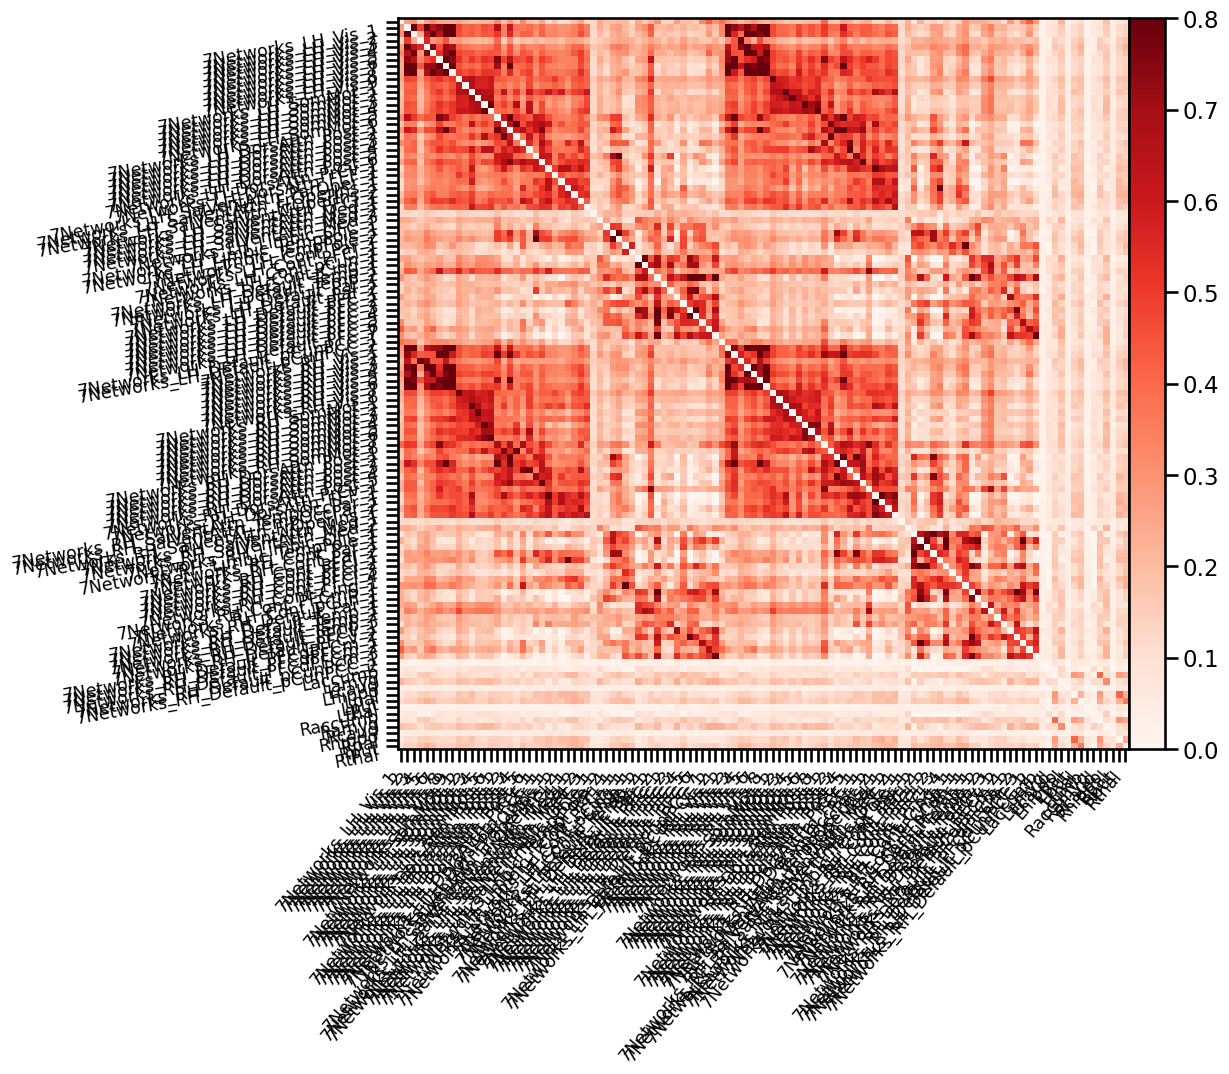

In [5]:
fc_combined_mat_schaef_100, fc_combined_labels_schaef_100 = load_fc_as_one(parcellation='schaefer_100')
print(fc_combined_mat_schaef_100.shape)
fc_all_schaef = plotting.plot_matrix(fc_combined_mat_schaef_100, figure=(9, 9), labels=fc_combined_labels_schaef_100, vmax=0.8, vmin=0, cmap='Reds')

In [6]:
print(fc_combined_labels_schaef_100)
print(fc_combined_mat_schaef_100)
Y_fc = fc_combined_mat_schaef_100

['7Networks_LH_Vis_1' '7Networks_LH_Vis_2' '7Networks_LH_Vis_3'
 '7Networks_LH_Vis_4' '7Networks_LH_Vis_5' '7Networks_LH_Vis_6'
 '7Networks_LH_Vis_7' '7Networks_LH_Vis_8' '7Networks_LH_Vis_9'
 '7Networks_LH_SomMot_1' '7Networks_LH_SomMot_2' '7Networks_LH_SomMot_3'
 '7Networks_LH_SomMot_4' '7Networks_LH_SomMot_5' '7Networks_LH_SomMot_6'
 '7Networks_LH_DorsAttn_Post_1' '7Networks_LH_DorsAttn_Post_2'
 '7Networks_LH_DorsAttn_Post_3' '7Networks_LH_DorsAttn_Post_4'
 '7Networks_LH_DorsAttn_Post_5' '7Networks_LH_DorsAttn_Post_6'
 '7Networks_LH_DorsAttn_PrCv_1' '7Networks_LH_DorsAttn_FEF_1'
 '7Networks_LH_SalVentAttn_ParOper_1'
 '7Networks_LH_SalVentAttn_FrOperIns_1'
 '7Networks_LH_SalVentAttn_FrOperIns_2' '7Networks_LH_SalVentAttn_PFCl_1'
 '7Networks_LH_SalVentAttn_Med_1' '7Networks_LH_SalVentAttn_Med_2'
 '7Networks_LH_SalVentAttn_Med_3' '7Networks_LH_Limbic_OFC_1'
 '7Networks_LH_Limbic_TempPole_1' '7Networks_LH_Limbic_TempPole_2'
 '7Networks_LH_Cont_Par_1' '7Networks_LH_Cont_PFCl_1'
 '7Networ

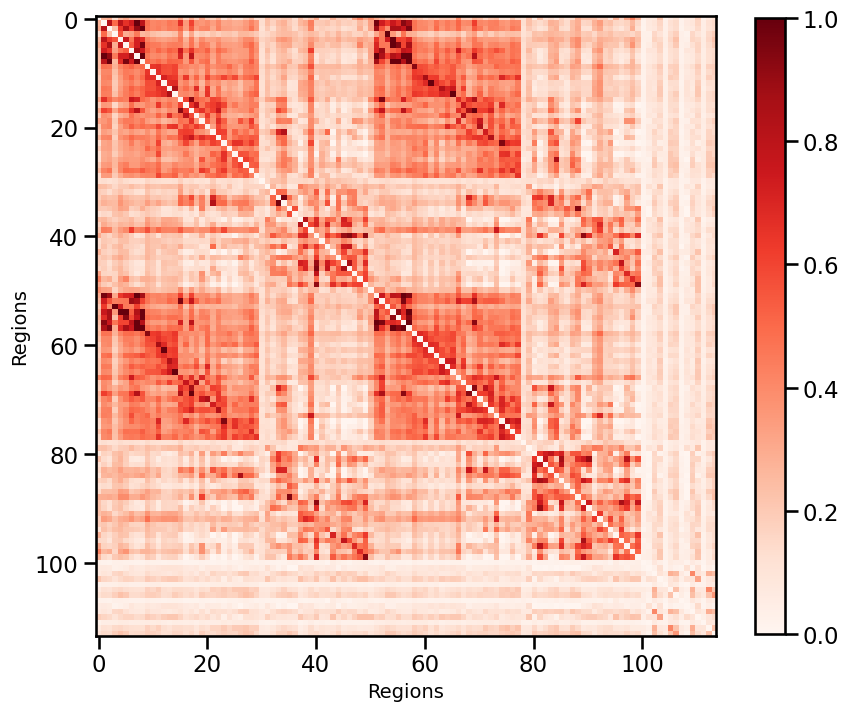

In [7]:
Y_fc = load_connectome(measure='FC', omit_subcortical=False)
plot_connectome(Y_fc)

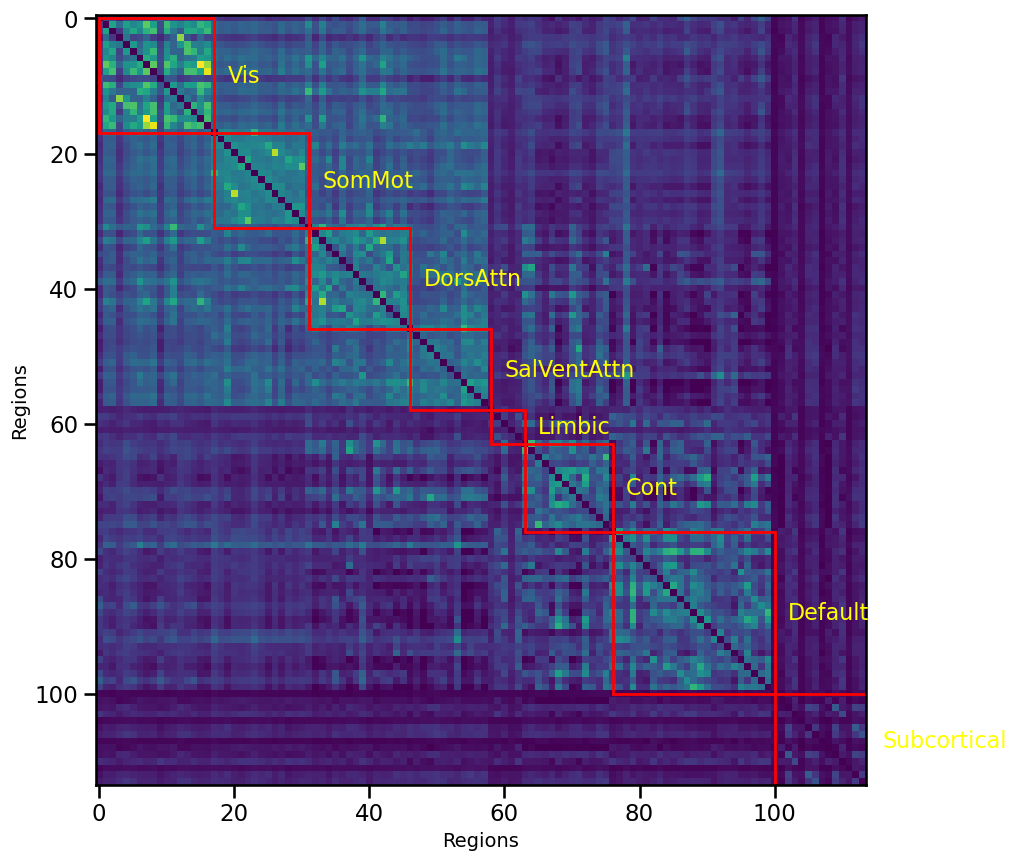

In [8]:
plot_connectome_with_labels(Y_fc, fc_combined_labels_schaef_100)


#### Louvain community detection

In [14]:
Y = load_connectome()
Y

array([[0.      , 0.26568 , 0.30028 , ..., 0.024612, 0.063759, 0.10236 ],
       [0.26568 , 0.      , 0.81838 , ..., 0.044932, 0.11656 , 0.14287 ],
       [0.30028 , 0.81838 , 0.      , ..., 0.044392, 0.10615 , 0.13455 ],
       ...,
       [0.024612, 0.044932, 0.044392, ..., 0.      , 0.094907, 0.081454],
       [0.063759, 0.11656 , 0.10615 , ..., 0.094907, 0.      , 0.23389 ],
       [0.10236 , 0.14287 , 0.13455 , ..., 0.081454, 0.23389 , 0.      ]])

In [22]:
relative_data_path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = par_dir + '/data'
schaef_df = pd.read_csv(relative_data_path + '/GeneEx2Conn_data/atlas_info/schaef114.csv')
schaef_df

Unnamed: 0             label_x  index   label_y network_label  \
0             0  7Networks_LH_Vis_1    1.0  LH_Vis_1           Vis   
1             1  7Networks_LH_Vis_2    2.0  LH_Vis_2           Vis   
2             2  7Networks_LH_Vis_3    3.0  LH_Vis_3           Vis   
3             3  7Networks_LH_Vis_4    4.0  LH_Vis_4           Vis   
4             4  7Networks_LH_Vis_5    5.0  LH_Vis_5           Vis   
..          ...                 ...    ...       ...           ...   
109         109               Rcaud    NaN       NaN     Subcortex   
110         110              Rhippo    NaN       NaN     Subcortex   
111         111                Rpal    NaN       NaN     Subcortex   
112         112                Rput    NaN       NaN     Subcortex   
113         113               Rthal    NaN       NaN     Subcortex   

         label_7network  index_17network                   label_17network  \
0    7Networks_LH_Vis_1             49.0      17Networks_LH_DefaultC_PHC_1   
1    7Networks_LH_Vis_2              1.0     17Networks_LH_VisCent_ExStr_1   
2    7Networks_LH_Vis_3              5.0  17Networks_LH_VisPeri_ExStrInf_1   
3    7Networks_LH_Vis_4              2.0     17Networks_LH_VisCent_ExStr_2   
4    7Networks_LH_Vis_5              3.0   17Networks_LH_VisCent_Striate_1   
..                  ...              ...                               ...   
109                 NaN              NaN                               NaN   
110                 NaN              NaN                               NaN   
111                 NaN              NaN                               NaN   
112                 NaN              NaN                               NaN   
113                 NaN              NaN                               NaN   

    network_label_17network atlas_name  network_id   id hemisphere  structure  \
0                  DefaultC      4S156         NaN  1.0          L     cortex   
1                   VisCent      4S156         NaN  2.0          L     cortex   
2                   VisPeri      4S156         NaN  3.0          L     cortex   
3                   VisCent      4S156         NaN  4.0          L     cortex   
4                   VisCent      4S156         NaN  5.0          L     cortex   
..                      ...        ...         ...  ...        ...        ...   
109                     NaN        NaN         NaN  NaN          R  subcortex   
110                     NaN        NaN         NaN  NaN          R  subcortex   
111                     NaN        NaN         NaN  NaN          R  subcortex   
112                     NaN        NaN         NaN  NaN          R  subcortex   
113                     NaN        NaN         NaN  NaN          R  subcortex   

         mni_x      mni_y      mni_z  
0   -25.819797 -32.624365 -17.459391  
1   -25.481288 -76.591819 -13.514360  
2   -16.424947 -60.957717  -6.735729  
3   -27.130818 -94.490566  -4.744654  
4    -6.226506 -92.462651  -3.036145  
..         ...        ...        ...  
109  14.720000   7.160000   9.640000  
110  26.370000 -21.140000 -13.890000  
111  12.420000   3.790000  -8.420000  
112  25.880000   1.930000   0.600000  
113   6.020000 -14.840000   2.840000  

[114 rows x 17 columns]

Graph with 114 nodes and 6441 edges
[{1, 66, 3, 4, 69, 6, 7, 5, 2, 8, 15, 17, 51, 52, 53, 54, 55, 56, 57}, {64, 65, 67, 9, 10, 11, 12, 13, 14, 18, 20, 101, 108, 58, 59, 60, 61, 62, 63}, {0, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 78, 79, 81, 82, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113}, {68, 70, 71, 72, 73, 74, 75, 76, 77, 16, 80, 19, 83, 21, 22, 23, 24, 25, 26, 27, 28, 29, 87, 33, 34, 39, 84}]


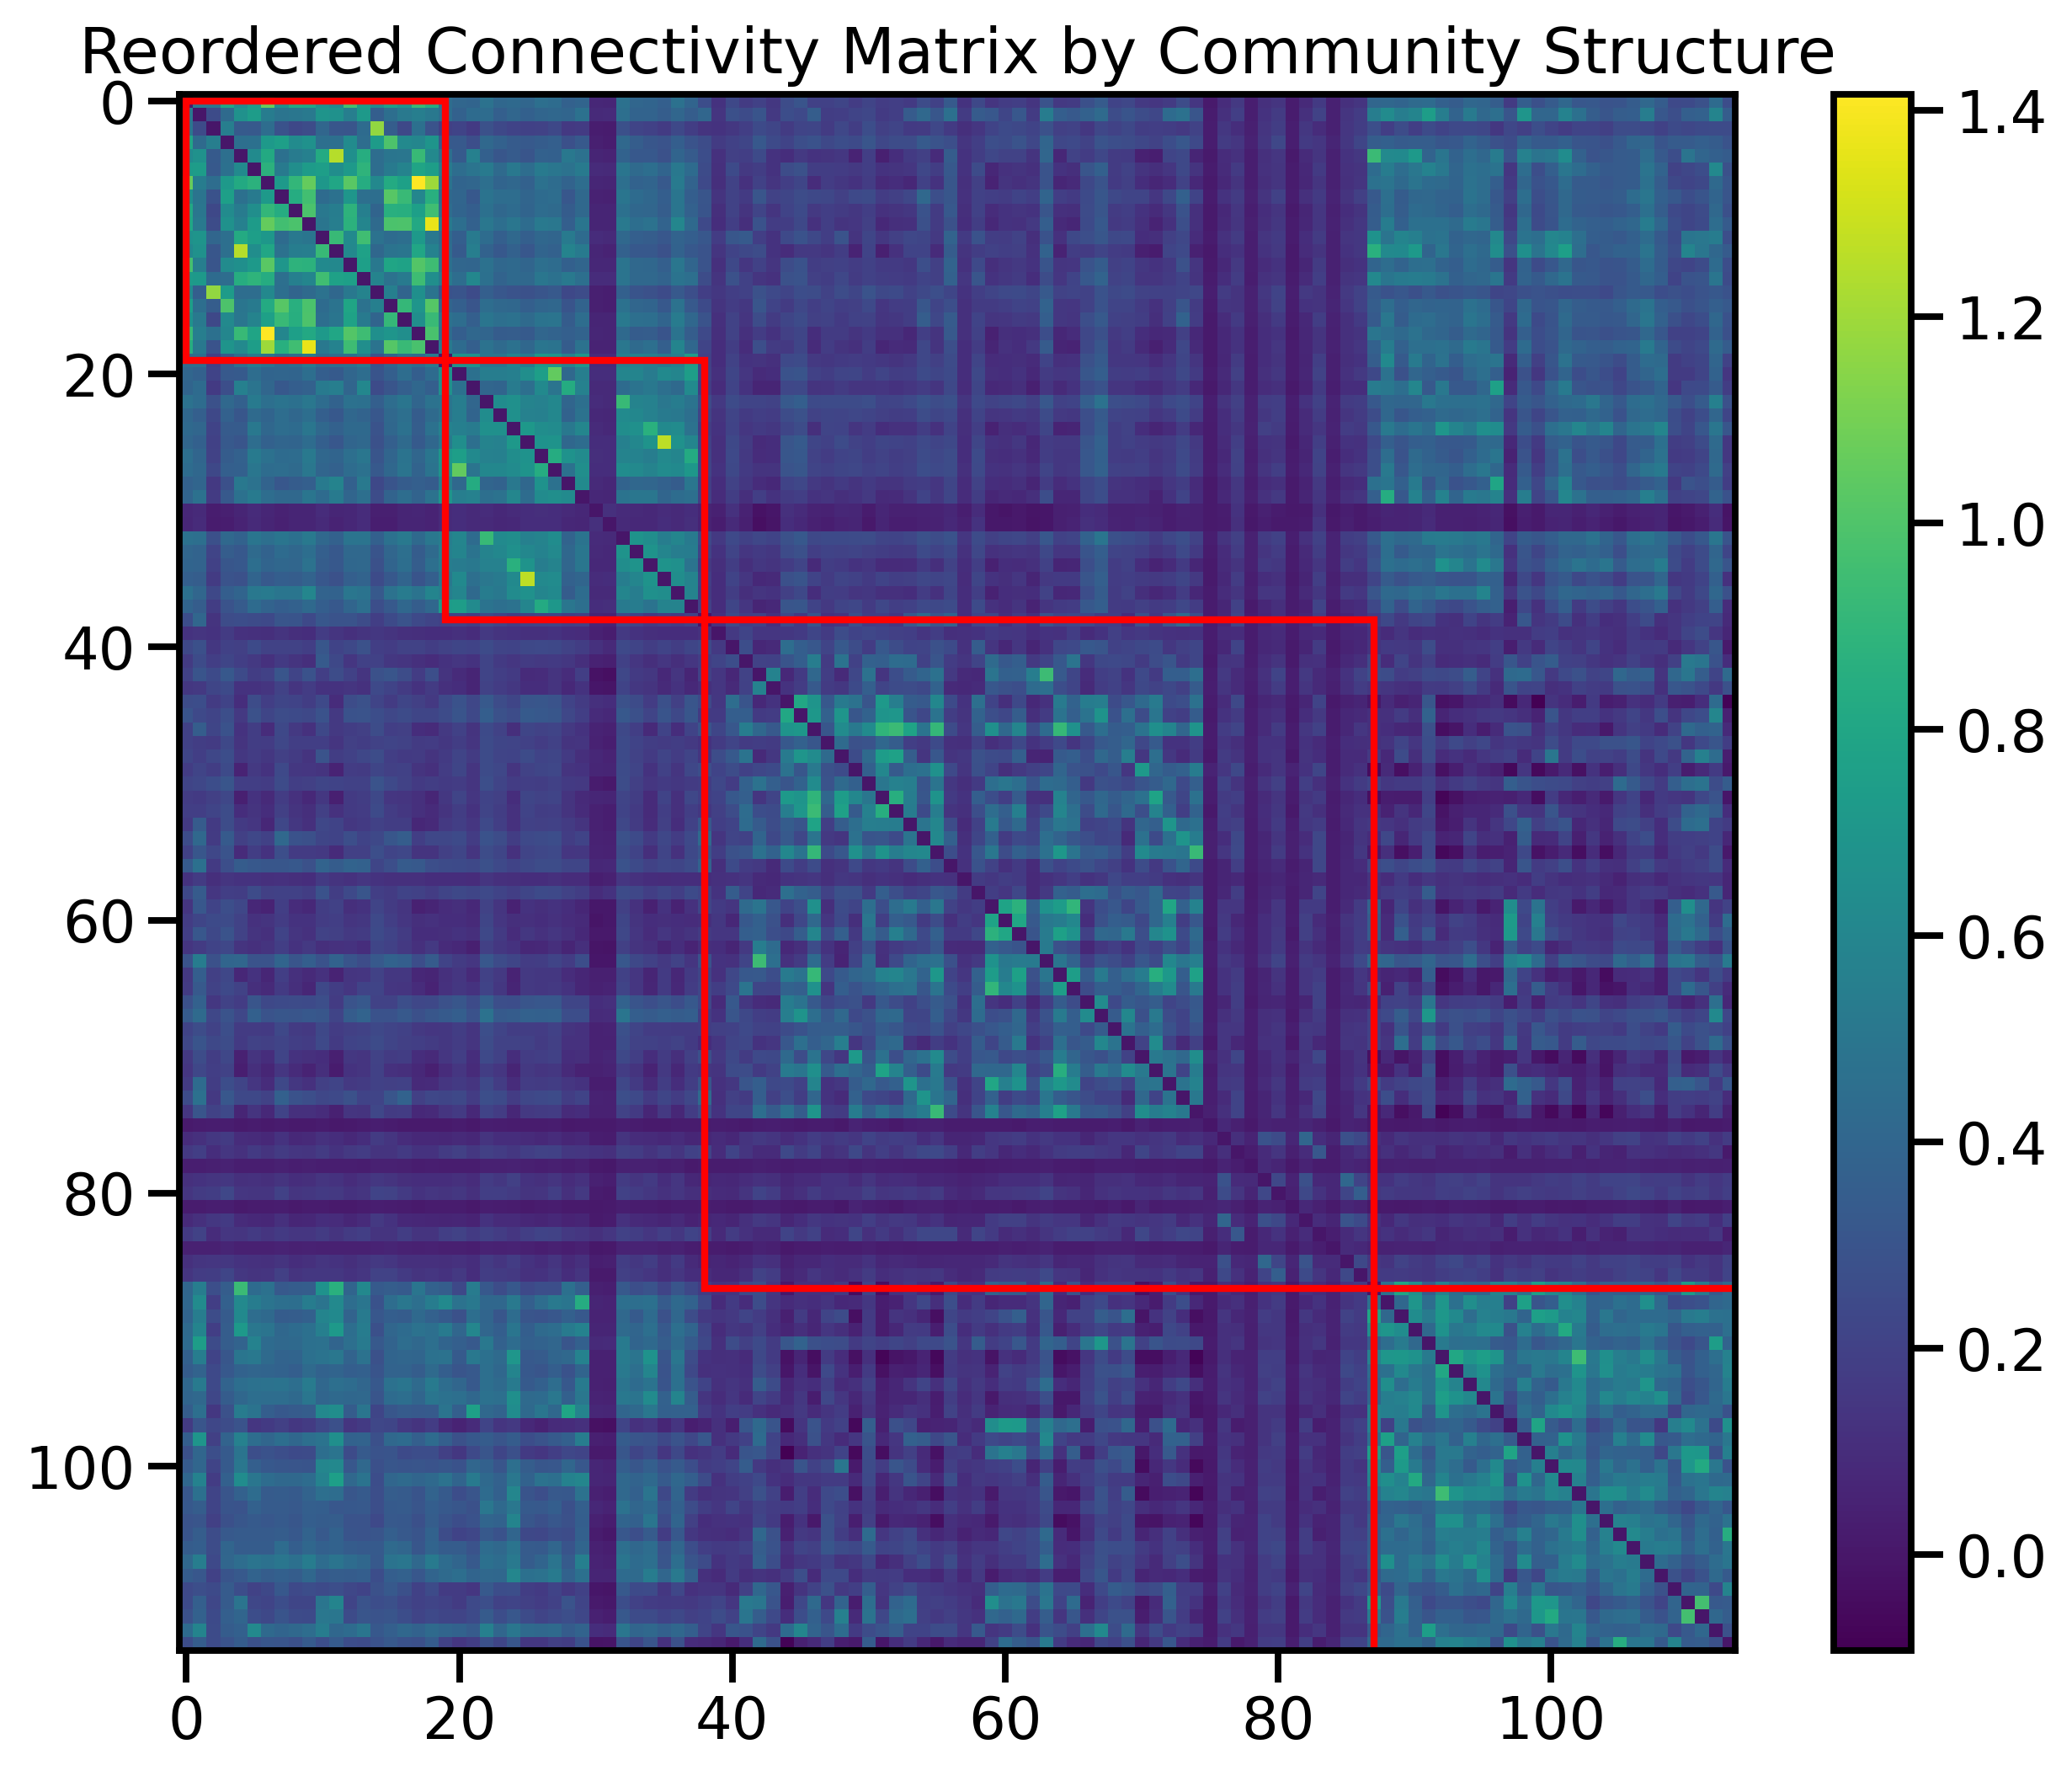

In [24]:
Y = load_connectome()
connectome_net = nx.Graph(incoming_graph_data=Y)
print(connectome_net)

resolution=1.01
seed=4
# resolution parameter should be maximized until an inner train is infeasible/impractical to evaluate (1.1 could technically work)
communities = nx.community.louvain_communities(connectome_net, seed=seed, resolution=resolution)
print(communities)

# Create a new ordering of nodes based on louvain community detection
new_order = []
for community in communities:
    new_order.extend(community)

# Map the original indices to the new ordering
index_map = {old_idx: new_idx for new_idx, old_idx in enumerate(new_order)}

# Reorder the matrix
Y_reordered = Y[np.ix_(new_order, new_order)]

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)  # Increased dpi and size for high resolution

# Visualize the reordered matrix
cax = ax.imshow(Y_reordered, cmap='viridis')

# Add colorbar
plt.colorbar(cax)

# Add red boxes around communities
start = 0
for community in communities:
    size = len(community)
    rect = patches.Rectangle((start, start), size, size, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    start += size

plt.title('Reordered Connectivity Matrix by Community Structure')
plt.show()

In [25]:
X = load_transcriptome()
community_obj = CommunityCVSplit(X, Y, resolution=1.01, random_seed=2)

In [26]:
community_obj.networks

{'1': [1, 2, 66, 4, 5, 6, 69, 8, 7, 3, 15, 17, 51, 52, 53, 54, 55, 56, 57],
 '2': [0,
  30,
  31,
  32,
  35,
  36,
  37,
  38,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  78,
  79,
  81,
  82,
  85,
  86,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  102,
  103,
  104,
  105,
  106,
  107,
  109,
  110,
  111,
  112,
  113],
 '3': [64,
  65,
  67,
  9,
  10,
  11,
  12,
  13,
  14,
  18,
  20,
  101,
  108,
  58,
  59,
  60,
  61,
  62,
  63],
 '4': [68,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  16,
  80,
  19,
  83,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  87,
  33,
  34,
  39,
  84]}

In [27]:
X = load_transcriptome()
random_obj = RandomCVSplit(X, Y, num_splits=4, shuffled=True, use_random_state=True, random_seed=42)


In [28]:
random_obj.networks

{'1': array([  0,   4,  10,  11,  12,  18,  22,  26,  31,  36,  40,  44,  45,
         47,  53,  66,  67,  69,  70,  72,  80,  81,  83,  91,  98, 103,
        108, 111, 112]),
 '2': array([  5,   7,   9,  15,  16,  19,  25,  27,  28,  30,  33,  34,  35,
         39,  42,  43,  55,  56,  62,  64,  65,  68,  78,  85,  90,  95,
        101, 104, 107]),
 '3': array([  3,   6,   8,  13,  17,  24,  38,  41,  46,  48,  49,  50,  54,
         57,  58,  61,  73,  75,  76,  77,  79,  84,  88,  89,  93,  96,
         97, 110]),
 '4': array([  1,   2,  14,  20,  21,  23,  29,  32,  37,  51,  52,  59,  60,
         63,  71,  74,  82,  86,  87,  92,  94,  99, 100, 102, 105, 106,
        109, 113])}

In [29]:
louvain_communities = [
    {1, 2, 66, 4, 5, 6, 69, 8, 7, 3, 15, 17, 51, 52, 53, 54, 55, 56, 57},
    {0, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 78, 79, 81, 82, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113},
    {64, 65, 67, 9, 10, 11, 12, 13, 14, 18, 20, 101, 108, 58, 59, 60, 61, 62, 63},
    {68, 70, 71, 72, 73, 74, 75, 76, 77, 16, 80, 19, 83, 21, 22, 23, 24, 25, 26, 27, 28, 29, 87, 33, 34, 39, 84}
]

random_communities = [
    {0, 4, 10, 11, 12, 18, 22, 26, 31, 36, 40, 44, 45, 47, 53, 66, 67, 69, 70, 72, 80, 81, 83, 91, 98, 103, 108, 111, 112},
    {5, 7, 9, 15, 16, 19, 25, 27, 28, 30, 33, 34, 35, 39, 42, 43, 55, 56, 62, 64, 65, 68, 78, 85, 90, 95, 101, 104, 107},
    {3, 6, 8, 13, 17, 24, 38, 41, 46, 48, 49, 50, 54, 57, 58, 61, 73, 75, 76, 77, 79, 84, 88, 89, 93, 96, 97, 110},
    {1, 2, 14, 20, 21, 23, 29, 32, 37, 51, 52, 59, 60, 63, 71, 74, 82, 86, 87, 92, 94, 99, 100, 102, 105, 106, 109, 113}
]

In [30]:
schaef_df['network_label'].unique()

array(['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont',
       'Default', 'Subcortex'], dtype=object)

In [31]:
import numpy as np
import pandas as pd
from nichord.coord_labeler import get_idx_to_label

# Step 1: Extract relevant data from the `schaef_df`
# Filter out rows without valid MNI coordinates and network labels
schaef_valid = schaef_df.dropna(subset=['mni_x', 'mni_y', 'mni_z', 'network_label'])

# Extract MNI coordinates
coords = schaef_valid[['mni_x', 'mni_y', 'mni_z']].values.tolist()

# Create a mapping from index to network label (assuming the index corresponds to region)
idx_to_label = {idx: label for idx, label in enumerate(schaef_valid['network_label'].tolist())}

# Step 2: Construct edges and edge weights from the connectivity matrix `Y`
# Here we assume Y is symmetric and the diagonal is zero (no self-loops)
edges = []
edge_weights = []

num_regions = Y.shape[0]

for i in range(num_regions):
    for j in range(i+1, num_regions):  # Only consider upper triangular part
        weight = Y[i, j]
        if weight != 0:  # Only add non-zero connections
            edges.append((i, j))  # Create an edge between region i and j
            edge_weights.append(weight)  # Add the corresponding weight


In [44]:
# CREATE A GLASS BRAIN WITH JUST THE NODES
one_weights = list(np.ones(len(edge_weights)))
zero_weights = list(np.zeros(len(edge_weights)))

# Extract the coordinates from the DataFrame
coordinates = load_coords()
# Compute pairwise Euclidean distances
distance = squareform(pdist(coordinates, metric='euclidean'))
distances = np.exp((-distance**2)/10**4)


# Step 2: Construct edges and edge weights from the connectivity matrix `Y`
# Here we assume Y is symmetric and the diagonal is zero (no self-loops)
dist_edges = []
dist_weights = []

num_regions = Y.shape[0]

for i in range(num_regions):
    for j in range(i+1, num_regions):  # Only consider upper triangular part
        weight = distances[i, j]
        if weight != 0:  # Only add non-zero connections
            dist_edges.append((i, j))  # Create an edge between region i and j
            dist_weights.append(weight)  # Add the corresponding weight


def create_distance_glassbrain_plot():
    # Output path for the glass brain image
    glassbrain_file = './glass/distance_glassbrain3.png'
    
    # Define network colors (this should match the colors used for plotting the nodes)
    network_colors = {
        'Vis': 'purple',
        'SomMot': 'darkturquoise',
        'DorsAttn': 'green',
        'SalVentAttn': 'fuchsia',
        'Limbic': 'burlywood',
        'Cont': 'orange',
        'Default': 'red', 
        'Subcortex': 'blue'
    }
    
    # Plot the glass brain with smaller nodes, thinner lines, and more transparency
    plot_glassbrain(
        idx_to_label, 
        dist_edges, 
        dist_weights, 
        glassbrain_file, 
        coords, 
        node_size=0.,  # Adjust node size (smaller)
        linewidths=0.,  # Adjust linewidths (thinner)
        alphas=.9  # Adjust transparency (more translucent)
    )


# Create the glass brain plot
create_distance_glassbrain_plot()


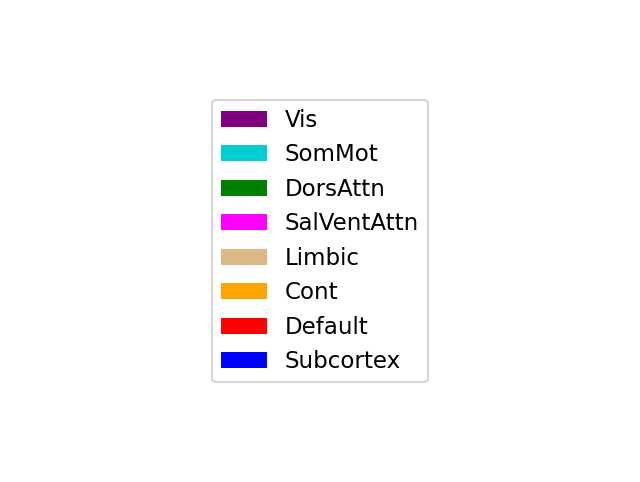

In [50]:

def create_glassbrain_plot():
    # Output path for the glass brain image
    glassbrain_file = './glass/schaefer_glassbrain.png'
    
    # Define network colors (this should match the colors used for plotting the nodes)
    network_colors = {
        'Vis': 'purple',
        'SomMot': 'darkturquoise',
        'DorsAttn': 'green',
        'SalVentAttn': 'fuchsia',
        'Limbic': 'burlywood',
        'Cont': 'orange',
        'Default': 'red', 
        'Subcortex': 'blue'
    }
    
    # Plot the glass brain with smaller nodes, thinner lines, and more transparency
    plot_glassbrain(
        idx_to_label, 
        edges, 
        edge_weights, 
        glassbrain_file, 
        coords, 
        node_size=5,  # Adjust node size (smaller)
        linewidths=2,  # Adjust linewidths (thinner)
        alphas=0.5  # Adjust transparency (more translucent)
    )

    # Manually create legend items using network_colors
    legend_elements = [Patch(facecolor=color, label=label) for label, color in network_colors.items()]
    
    # Create a new figure and axis for displaying the legend
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the legend (without any data plotted)
    ax.legend(handles=legend_elements, loc='center')
    
    # Remove axis for the legend plot
    ax.axis('off')
    
    # Save the legend as a separate image, or display it directly
    legend_file = './glass/schaefer_glassbrain_legend.png'
    plt.savefig(legend_file, dpi=400)
    plt.show()

# Create the glass brain plot
create_glassbrain_plot()

In [38]:
# Step 2: Prepare the coordinates and labels from `schaef_df`
coords = schaef_df[['mni_x', 'mni_y', 'mni_z']].values.tolist()  # MNI coordinates for each node
idx_to_label = {idx: label for idx, label in enumerate(schaef_df['network_label'].tolist())}  # Network labels

# Step 3: Create glassbrain plots for each community
def plot_community_glassbrain(community_idx, community, seed, Y, coords, idx_to_label, save_path='./glass/', random=''):
    """
    Plot glassbrain for a specific community.
    
    Args:
    - community_idx: The index of the community.
    - community: A set of nodes in the community.
    - Y: The full connectivity matrix.
    - coords: The coordinates for all the nodes.
    - idx_to_label: Dictionary mapping node indices to network labels.
    - save_path: The directory to save the glassbrain plots.
    """
    # Create a subgraph of the community by filtering edges between community members
    community_nodes = sorted(community)  # Sort the nodes within the community
    edges = []
    edge_weights = []
    
    for i in range(len(community_nodes)):
        for j in range(i + 1, len(community_nodes)):
            weight = Y[community_nodes[i], community_nodes[j]]
            if weight != 0:
                edges.append((i, j))
                edge_weights.append(weight)

    # Map community node indices to coordinates and labels
    community_coords = [coords[node] for node in community_nodes]
    community_idx_to_label = {i: idx_to_label[node] for i, node in enumerate(community_nodes)}

    # Save the glassbrain plot for this community
    glassbrain_file = f'{save_path}{random}community{seed}_{community_idx}.png'
    plot_glassbrain(
        idx_to_label=community_idx_to_label, 
        edges=edges, 
        edge_weights=edge_weights, 
        fp_glass=glassbrain_file, 
        coords=community_coords, 
        node_size=3,  # Adjust node size (smaller)
        linewidths=2,  # Adjust linewidths (thinner)
        alphas=0.4  # Adjust transparency (more translucent)
    )

# Step 4: Plot glassbrains for all communities
'''
save_path = './glass/'  # Directory to save the glassbrain plots
for community_idx, community in enumerate(communities):
    plot_community_glassbrain(community_idx, community, seed, Y, coords, idx_to_label, save_path=save_path)
'''

# Step 4: Plot glassbrains for all communities
save_path = './glass/'  # Directory to save the glassbrain plots
for community_idx, community in enumerate(random_communities):
    plot_community_glassbrain(community_idx, community, seed, Y, coords, idx_to_label, save_path=save_path, random='random')

In [36]:
import os
import itertools
from nichord.glassbrain import plot_glassbrain

def plot_subcommunity_glassbrains(communities, Y, coords, idx_to_label, output_dir='community_glassbrains', fp_glass=None):
    """
    Generate glassbrain plots for all subcombinations (n-1) of communities.

    Args:
    - communities: List of detected communities from Louvain algorithm.
    - Y: Connectivity matrix (connectome).
    - coords: Coordinates of nodes in MNI space.
    - idx_to_label: Dictionary mapping node indices to labels (network names).
    - output_dir: Directory to save the glassbrain plots.
    - fp_glass: Optional file prefix for saving the glassbrains.
    """
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Get all n-1 combinations of communities
    community_combinations = list(itertools.combinations(communities, len(communities) - 1))
    
    for i, comb in enumerate(community_combinations):
        print(f"Processing combination {i+1} of {len(community_combinations)}: {comb}")

        # Flatten the nodes from the combined community
        combined_nodes = set(itertools.chain(*comb))

        # Filter edges and edge_weights that belong to the combined nodes
        edges, edge_weights = [], []
        for u, v in zip(*np.triu_indices_from(Y, k=1)):
            if u in combined_nodes and v in combined_nodes:
                edges.append((u, v))
                edge_weights.append(Y[u, v])
        
        # Generate a unique filename for each combination
        filename = f"subcomb_comb_{i+1}.png"
        full_fp_glass = os.path.join(output_dir, filename)  # Correct the file path

        # Plot the glassbrain for this combination
        plot_glassbrain(
            idx_to_label=idx_to_label,
            edges=edges,
            edge_weights=edge_weights,
            fp_glass=full_fp_glass,
            coords=coords,
            node_size=5,
            linewidths=2,
            alphas=0.4  # More translucent edges
        )
        
        print(f"Saved glassbrain plot: {full_fp_glass}")

    print(f"All subcommunity combinations ({len(community_combinations)}) have been processed.")

In [ ]:

# Now plot glassbrains for all (n-1) subcommunity combinations
plot_subcommunity_glassbrains(communities, Y, coords, idx_to_label, output_dir='community_glassbrains', fp_glass='subcomb')

In [37]:

# Now plot glassbrains for all (n-1) subcommunity combinations
plot_subcommunity_glassbrains(random_communities, Y, coords, idx_to_label, output_dir='random_glassbrains', fp_glass='subcomb')

Processing combination 1 of 4: ({0, 66, 67, 4, 69, 70, 72, 10, 11, 12, 80, 81, 18, 83, 22, 26, 91, 31, 98, 36, 103, 40, 44, 45, 108, 47, 111, 112, 53}, {64, 65, 68, 5, 7, 9, 78, 15, 16, 19, 85, 25, 90, 27, 28, 30, 95, 33, 34, 35, 101, 39, 104, 42, 43, 107, 55, 56, 62}, {3, 6, 8, 73, 75, 76, 13, 77, 79, 17, 84, 24, 88, 89, 93, 96, 97, 38, 41, 46, 110, 48, 49, 50, 54, 57, 58, 61})
Saved glassbrain plot: random_glassbrains/subcomb_comb_1.png
Processing combination 2 of 4: ({0, 66, 67, 4, 69, 70, 72, 10, 11, 12, 80, 81, 18, 83, 22, 26, 91, 31, 98, 36, 103, 40, 44, 45, 108, 47, 111, 112, 53}, {64, 65, 68, 5, 7, 9, 78, 15, 16, 19, 85, 25, 90, 27, 28, 30, 95, 33, 34, 35, 101, 39, 104, 42, 43, 107, 55, 56, 62}, {1, 2, 71, 74, 14, 82, 20, 21, 86, 23, 87, 92, 29, 94, 32, 99, 100, 37, 102, 105, 106, 109, 113, 51, 52, 59, 60, 63})
Saved glassbrain plot: random_glassbrains/subcomb_comb_2.png
Processing combination 3 of 4: ({0, 66, 67, 4, 69, 70, 72, 10, 11, 12, 80, 81, 18, 83, 22, 26, 91, 31, 98, 3

In [49]:
def plot_3d_umap_with_labels(X_subset, edge_labels, title="3D UMAP Plot", label_name="edge_label", color_discrete_sequence=None):
    """
    Generates a 3D UMAP plot with hover information based on edge labels.
    The plot is adjusted with smaller nodes and a discrete color scale.

    Parameters:
    - X_subset: The subsetted input matrix (e.g., gene expression or connectivity matrix)
    - edge_labels: The list of edge labels corresponding to each row in X_subset (e.g., macro-region or network labels)
    - title: Title of the UMAP plot
    - label_name: Name of the label to be used in hover information (e.g., 'macro-region', 'network')
    - color_discrete_sequence: List of colors to use for the discrete color scale. If None, default Plotly colors are used.
    """
    # Step 1: Run UMAP to reduce X_subset to 3D
    umap_model = umap.UMAP(n_components=3, random_state=42)
    umap_embedding = umap_model.fit_transform(X_subset)

    # Step 2: Prepare data for Plotly
    # Convert the UMAP embedding and labels into a DataFrame for Plotly
    umap_df = pd.DataFrame(umap_embedding, columns=['UMAP_1', 'UMAP_2', 'UMAP_3'])
    umap_df[label_name] = edge_labels

    # Step 3: Plot the 3D UMAP using Plotly Express with hover information
    if color_discrete_sequence is None:
        color_discrete_sequence = px.colors.qualitative.Set3  # Default Plotly qualitative colors

    fig = px.scatter_3d(
        umap_df, 
        x='UMAP_1', y='UMAP_2', z='UMAP_3',
        color=label_name, 
        labels={label_name: label_name},
        hover_data={label_name: True},  # Include the label in hover information
        title=title,
        color_discrete_sequence=color_discrete_sequence  # Use discrete color scale for categorical data
    )

    fig.update_traces(marker=dict(size=3))  # Smaller marker size
    fig.update_layout(
        autosize=False,
        width=800,  # Set plot width
        height=800,  # Set plot height
        showlegend=True
    )
    fig.show()


Generating 3D UMAP plot colored by Macro Region Edge Labels...


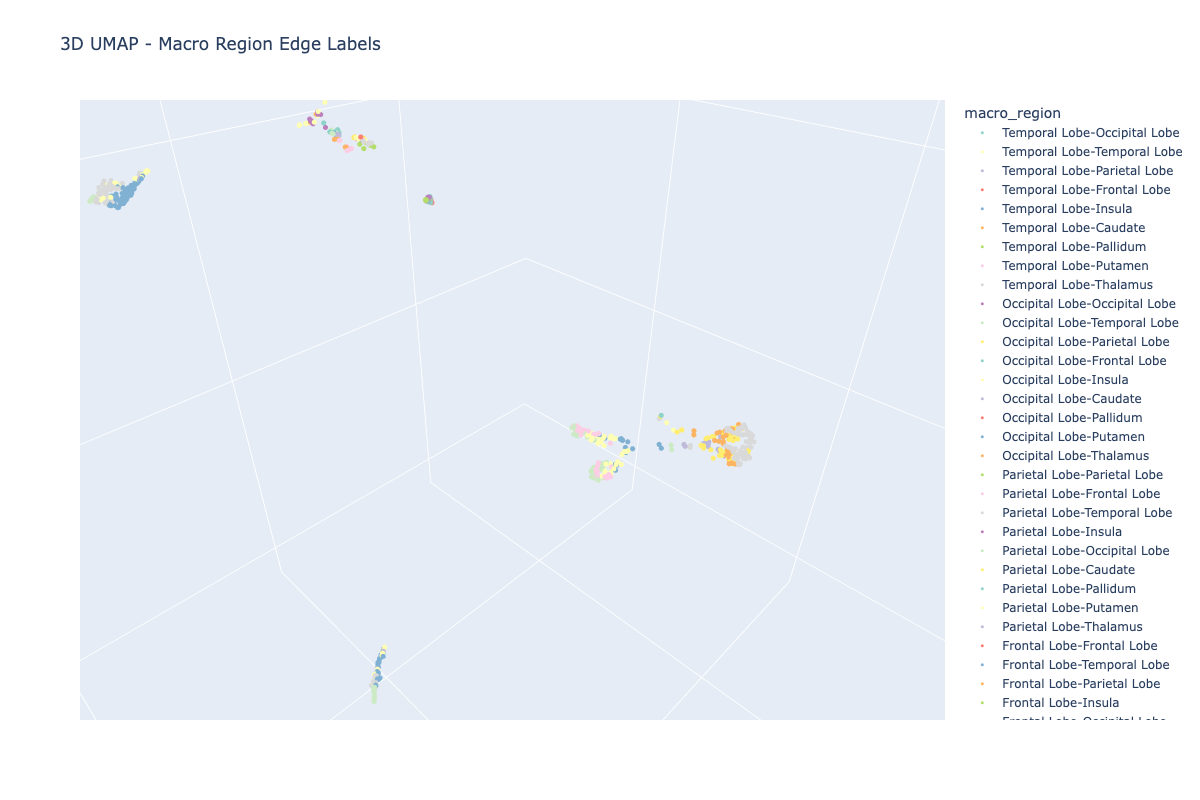

In [50]:
print("Generating 3D UMAP plot colored by Macro Region Edge Labels...")
plot_3d_umap_with_labels(X_subset, macro_region_edge_labels_subset, title="3D UMAP - Macro Region Edge Labels", label_name="macro_region")


Generating 3D UMAP plot colored by Network Edge Labels...


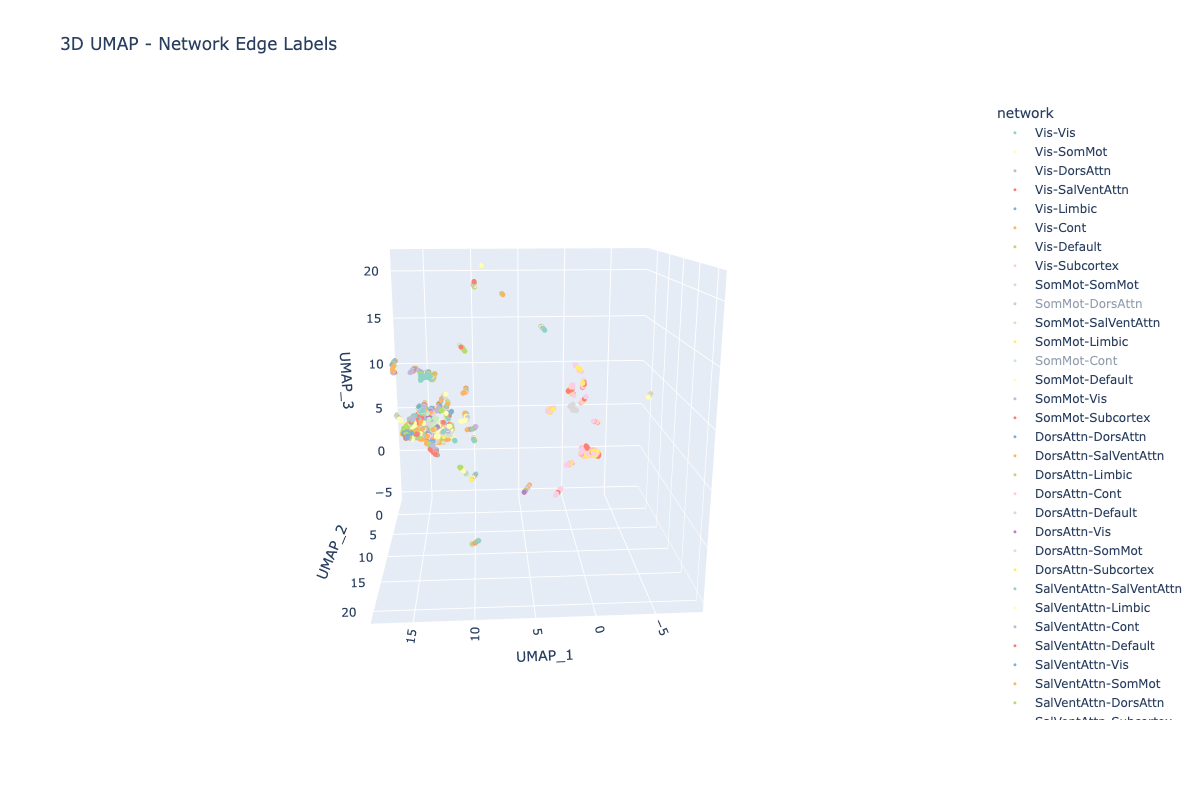

In [51]:
print("Generating 3D UMAP plot colored by Network Edge Labels...")
plot_3d_umap_with_labels(X_subset, network_edge_labels_subset, title="3D UMAP - Network Edge Labels", label_name="network")